## Exercício - Titanic
disponível em https://www.kaggle.com/c/titanic/overview

#### Descrição
O naufrágio do RMS Titanic é um dos naufrágios mais famosos da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou após colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia chocou a comunidade internacional e levou a melhores regulamentações de segurança para os navios.

Uma das razões pelas quais o naufrágio levou a tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas eram mais propensos a sobreviver do que outros, como mulheres, crianças e a classe alta.

Nesse desafio, a atividade é que você conclua a análise de que tipo de pessoa provavelmente sobreviverá. Em particular, solicitamos você deve aplicar classificadores de árvores de decisão para esta atividade.


### Descrição do dataset
Os dados foram divididos em dois grupos:

conjunto de treinamento (train.csv)
conjunto de teste (test.csv)
O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de máquina. Para o conjunto de treinamento, fornecemos o resultado (também conhecido como "verdade do solo") para cada passageiro. Seu modelo será baseado em "atributos", como sexo e classe dos passageiros. Você também pode usar a engenharia de atributos para criar novos atributos.

Parte do conjunto de treino deve ser usado para ver o desempenho do seu modelo em dados não vistos. 

Para o conjunto de testes, não é fornecido o rótulo de classe para cada passageiro. É seu trabalho prever esses resultados. Para cada passageiro no conjunto de testes, use o modelo que você treinou para prever se eles sobreviveram ou não ao naufrágio do Titanic. O resultado deve ser submetido na plataforma Kaggle (opção **submit predictions**) a fim de calcular a acurácia. 

Também incluímos gender_submission.csv, um conjunto de previsões que supõem que todas e apenas passageiras sobrevivem, como um exemplo da aparência de um arquivo de envio.

### Dicionário de Dados

**Variable -	Definition	- Key**

survival - Survival	- 0 = No, 1 = Yes

pclass -	Ticket class -	1 = 1st, 2 = 2nd, 3 = 3rd

sex -	Sex	

Age	- Age in years	

sibsp -	# of siblings / spouses aboard the Titanic	

parch- # of parents / children aboard the Titanic	

ticket - Ticket number	

fare - Passenger fare	

cabin- Cabin number	

embarked- Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Carrega as bibliotecas e pacotes necessários

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

Carrega o conjunto de dados de treinamento

In [64]:
data_train = pd.read_csv("train.csv", delimiter=',')
data_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Carrega o conjunto de dados de teste

In [65]:
data_test = pd.read_csv("test.csv", delimiter=',')
data_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Filtra algumas das features mais relevantes

In [66]:
features = ["Pclass", "Sex", "Parch"]
x_train = pd.get_dummies(data_train[features])
x_train

,Pclass,Parch,Sex_female,Sex_male
0,3,0,0,1
1,1,0,1,0
2,3,0,1,0
3,1,0,1,0
4,3,0,0,1
...,...,...,...,...
886,2,0,0,1
887,1,0,1,0
888,3,2,1,0
889,1,0,0,1


Filtra as labels

In [67]:
y_train = data_train["Survived"]
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

Cria e treina o modelo de árvore de decisão

In [68]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

[Text(0.46794871794871795, 0.9166666666666666, 'x[2] <= 0.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.21153846153846154, 0.75, 'x[0] <= 1.5\ngini = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(0.10256410256410256, 0.5833333333333334, 'x[1] <= 1.5\ngini = 0.466\nsamples = 122\nvalue = [77, 45]'),
 Text(0.05128205128205128, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.457\nsamples = 113\nvalue = [73, 40]'),
 Text(0.02564102564102564, 0.25, 'gini = 0.463\nsamples = 99\nvalue = [63, 36]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.408\nsamples = 14\nvalue = [10, 4]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[1] <= 3.0\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.1282051282051282, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.1794871794871795, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.32051282051282054, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.242\nsamples = 455\nvalue = [391, 64]'),
 Text(0.2564102564102564, 0.41666666

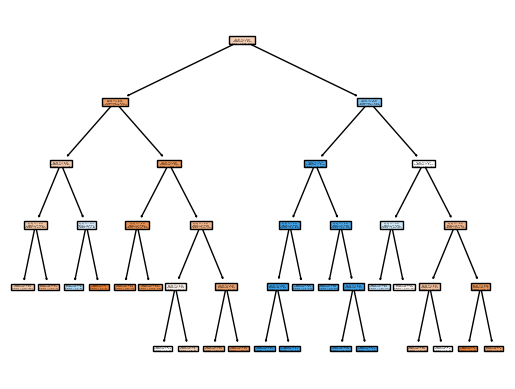

In [69]:
tree.plot_tree(dt, filled=True)

Faz a predição para o conjunto de teste

In [70]:
x_test = pd.get_dummies(data_test[features])
predictions = dt.predict(x_test)

Monta o arquivo de submissão

In [71]:
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)